# ExcessMapEstimator vs. TSMapEstimator

This notebooks compares the results of the full likelihood fitting approach ("forward folding") against the Li&Ma solution of the same problem ("backwards folding"). The results are expected to be approximately equivalent in case of using a disk kernel for the `TSMapEstimator` and neclecting the effect of the PSF.

Results:
- The results are indeed equivalent except of the definition of the predicted counts in the null hypothesis case and the upper limits.

- The `ExcessMapEstimator` is faster by a factor of 50-100 for ordinary flux and error estimation. Once assymetric errors and ULs are computed the `TSMapEstimator` shows the better performance and is ~7 times faster.

In [1]:
from gammapy.estimators import ExcessMapEstimator, TSMapEstimator
from gammapy.datasets import MapDataset
from gammapy.modeling.models import (
    SkyModel,
    PowerLawNormSpectralModel,
    PowerLawSpectralModel,
    DiskSpatialModel
)
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt

In [2]:
dataset = MapDataset.read(
    "$GAMMAPY_DATA/cta-1dc-gc/cta-1dc-gc.fits.gz", name="cta_dataset"
)
dataset.psf = None

In [3]:
est = ExcessMapEstimator(
    correlation_radius="0.1 deg",
)

model = SkyModel(
    spectral_model=PowerLawSpectralModel(),
    spatial_model=DiskSpatialModel(r_0="0.1 deg")
)

ts_est = TSMapEstimator(
    model=model,
    sum_over_energy_groups=True,
)

In [4]:
est_all = ExcessMapEstimator(
    correlation_radius="0.1 deg",
    selection_optional="all"
)


ts_est_all = TSMapEstimator(
    model=model,
    sum_over_energy_groups=True,
    selection_optional="all"
)

In [5]:
%%time
result = est.run(dataset=dataset)

CPU times: user 118 ms, sys: 24.7 ms, total: 142 ms
Wall time: 144 ms


In [6]:
%%time
result_ts = ts_est.run(dataset)

CPU times: user 9.94 s, sys: 163 ms, total: 10.1 s
Wall time: 10.5 s


In [7]:
%%time
result = est_all.run(dataset=dataset)

CPU times: user 2min 14s, sys: 2.02 s, total: 2min 16s
Wall time: 2min 26s


In [8]:
%%time
result_ts = ts_est_all.run(dataset)

CPU times: user 1min 11s, sys: 669 ms, total: 1min 12s
Wall time: 9h 31min 39s


In [9]:
def plot_side_by_side(m_1, m_2, **kwargs):
    fig, axes = plt.subplots(
        nrows=1, ncols=2, subplot_kw={"projection": m_1.geom.wcs}, figsize=(14, 5)
    )
    m_1.plot(axes[0], **kwargs)
    axes[0].set_title("ExcessMapEstimator")
    
    m_2.plot(axes[1], **kwargs)
    axes[1].set_title("TSMapEstimator")

## Flux

/Users/adonath/opt/anaconda3/envs/gammapy-dev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


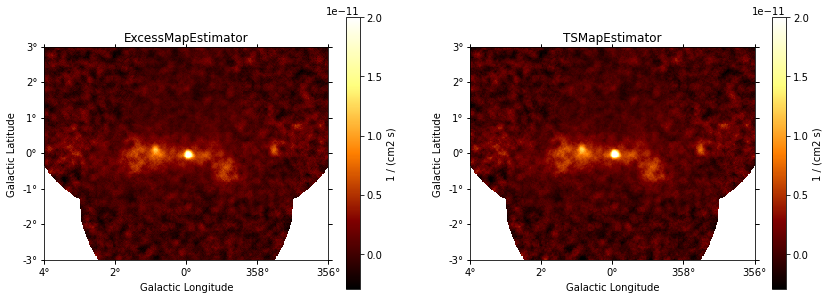

In [10]:
plot_side_by_side(
    result.flux,
    result_ts.flux,
    add_cbar=True,
    vmin=-0.3e-11,
    vmax=2e-11
);

## Flux Error

/Users/adonath/opt/anaconda3/envs/gammapy-dev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


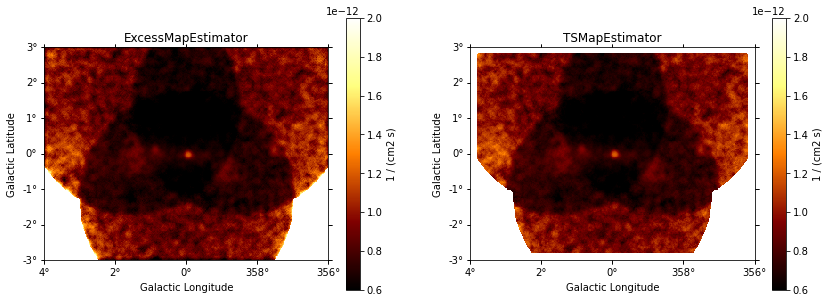

In [11]:
plot_side_by_side(
    result.flux_err,
    result_ts.flux_err,
    add_cbar=True,
    vmin=0.6e-12,
    vmax=2e-12
);

## Flux UL

/Users/adonath/opt/anaconda3/envs/gammapy-dev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


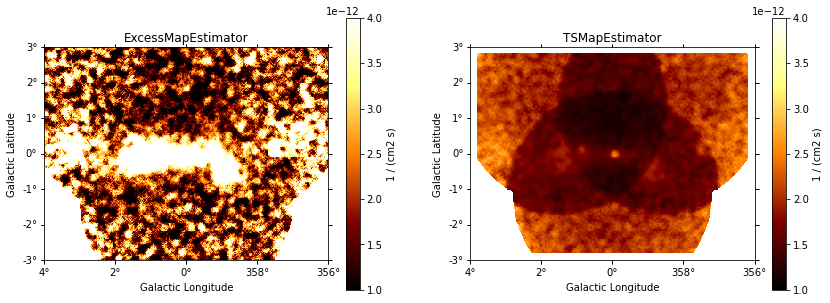

In [12]:
plot_side_by_side(
    result.flux_ul,
    result_ts.flux_ul,
    add_cbar=True,
    vmin=1e-12,
    vmax=4e-12,
);

## Flux Error Pos.

/Users/adonath/opt/anaconda3/envs/gammapy-dev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


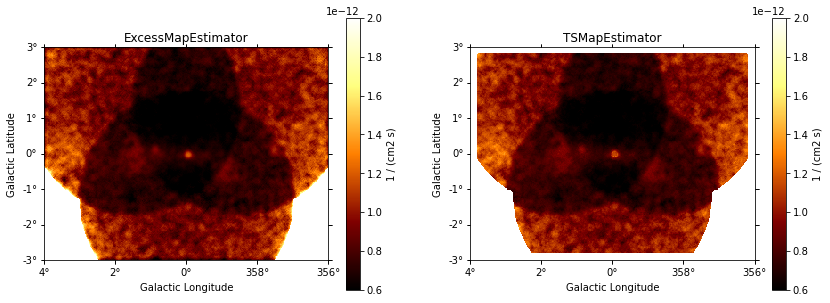

In [13]:
plot_side_by_side(
    result.flux_errp,
    result_ts.flux_errp,
    add_cbar=True,
    vmin=0.6e-12,
    vmax=2e-12
);

## Flux Error Neg.

/Users/adonath/opt/anaconda3/envs/gammapy-dev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


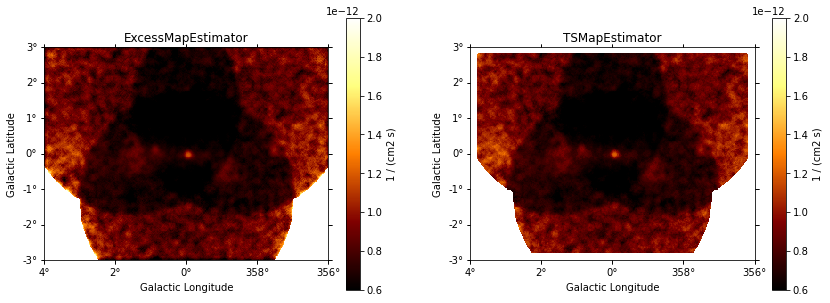

In [14]:
#result._data["norm_errn"].data *= -1

plot_side_by_side(
    result.flux_errn,
    result_ts.flux_errn,
    add_cbar=True,
    vmin=0.6e-12,
    vmax=2e-12
);

## Sqrt(TS)

/Users/adonath/opt/anaconda3/envs/gammapy-dev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


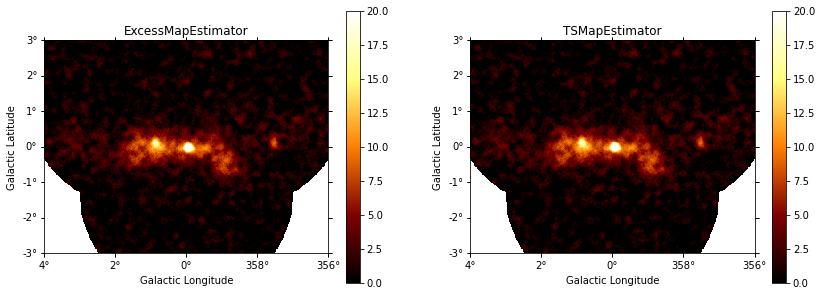

In [15]:
plot_side_by_side(
    result.sqrt_ts,
    result_ts.sqrt_ts,
    add_cbar=True,
    vmin=0,
    vmax=20,
);

## NPred Excess

/Users/adonath/opt/anaconda3/envs/gammapy-dev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


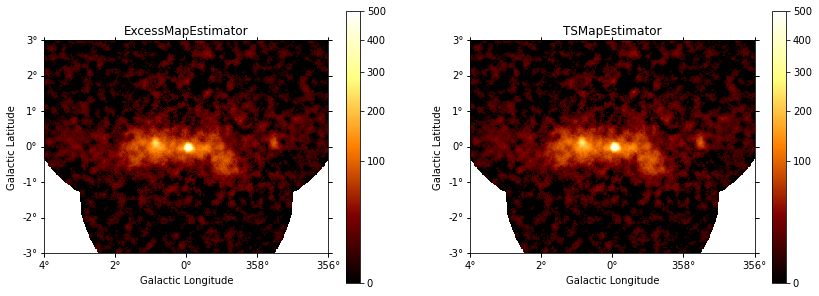

In [16]:
plot_side_by_side(
    result.npred_excess,
    result_ts.npred_excess,
    add_cbar=True,
    vmin=0,
    vmax=500,
    stretch="sqrt"
);

## NPred Null

/Users/adonath/opt/anaconda3/envs/gammapy-dev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


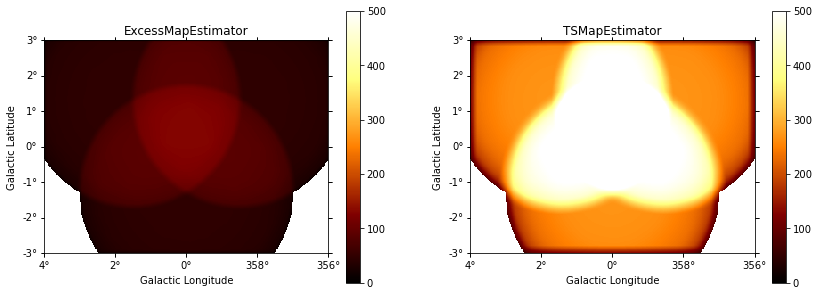

In [17]:
plot_side_by_side(
    result.npred_null,
    result_ts.npred_null,
    add_cbar=True,
    vmin=0,
    vmax=500,
);